<a href="https://colab.research.google.com/github/santifo/miRNA_analysis/blob/main/Module_02_scRNA_seq_Analysis_Bioconductor_Seurat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Setup**

In this section, we will setup all the computing environment to allow you to run the analyses needed for this part.

In [ ]:
## https://stackoverflow.com/questions/70025153/how-to-access-the-shell-in-google-colab-when-running-the-r-kernel
shell_call <- function(command, ...) {
  result <- system(command, intern = TRUE, ...)
  cat(paste0(result, collapse = "\n"))
}

loadPackages = function(pkgs){
  myrequire = function(...){
    suppressWarnings(suppressMessages(suppressPackageStartupMessages(require(...))))
  }
  ok = sapply(pkgs, require, character.only=TRUE, quietly=TRUE)
  if (!all(ok)){
    message("There are missing packages: ", paste(pkgs[!ok], collapse=", "))
  }
}

## Setup R2U
download.file("https://github.com/eddelbuettel/r2u/raw/master/inst/scripts/add_cranapt_jammy.sh",
              "add_cranapt_jammy.sh")
Sys.chmod("add_cranapt_jammy.sh", "0755")
shell_call("./add_cranapt_jammy.sh")
bspm::enable()
options(bspm.version.check=FALSE)
shell_call("rm add_cranapt_jammy.sh")

## Install the R packages
cranPkgs2Install = c("BiocManager", "ggpubr", "Seurat", "cowplot",
                     "Rtsne", "hdf5r", "clustree")
install.packages(cranPkgs2Install, ask=FALSE, update=TRUE, quietly=TRUE)
biocPkgs2Install = c("clusterProfiler", "preprocessCore", "rols",
                     "scDblFinder","clusterExperiment", "SingleR",
                     "celldex", "org.Hs.eg.db")
BiocManager::install(biocPkgs2Install, ask=FALSE, update=TRUE, quietly=TRUE)

53 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...
Building dependency tree...
Reading state information...
wget is already the newest version (1.21.2-2ubuntu1).
ca-certificates is already the newest version (20230311ubuntu0.22.04.1).
gnupg is already the newest version (2.2.27-3ubuntu2.1).
gnupg set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 53 not upgraded.
-----BEGIN PGP PUBLIC KEY BLOCK-----

mQINBFM+sY8BEADA70T+U0/2WNjOTLvytuXLvBC4vgA8hYvOaBS1cL3d8lu4mwr4
W84/6p4v/mXle/0eIO2D2g+XfK72ZHZxpS+bb7yPxrkCDLGxwUd/khtTJHSbbKFo
J73AsABflMe+8qv+E74+QTiXErTCNioFRz18sa0EvOnEAiokau6TZVYY2z9YjBNI
yEjTi+z+g8c1RL6VmrFEpTicTpafOLbkRyw0VKnAKG7Ytp3Ksc1G9/IAoKw3Q9La
0DJb5iX6hyB7+PNid6htK4LtPKZ2dNSrnRvNNkjj5BgcM2AT1hmxbzHNzIVmPoKA
CQFrkdjog3/PcyjdtZG7cfoSDXrbIAZeAa2ngLv9C/DJatVDd6maPOe66gLo7+As
ErMvO9vtiouqLdurW+Lhx0jFW9Ca3g1taLfbSDyS3X1mOGWcisbQvBqkIuoDQTeS
V4Z04wrwTZ1HtweKG/s5fmPtZNGWVI5YNRLIwdmbGzFTMPu2XTAOd+xSK2H+46Kh
Sh4kFeP6p

Tracing function "install.packages" in package "utils"

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.17 (BiocManager 1.30.21.1), R 4.3.1 (2023-06-16)

Installing package(s) 'BiocVersion', 'clusterProfiler', 'preprocessCore',
  'rols', 'scDblFinder', 'clusterExperiment', 'SingleR'

also installing the dependency ‘mbkmeans’


Old packages: 'basilisk.utils', 'BiocParallel', 'bit', 'cpp11', 'curl',
  'DelayedArray', 'DelayedMatrixStats', 'devtools', 'dir.expiry', 'DOSE', 'fs',
  'gargle', 'genefilter', 'gert', 'ggtree', 'HDF5Array', 'highr', 'isoband',
  'MatrixGenerics', 'openssl', 'rhdf5filters', 'roxygen2', 'S4Arrays',
  'ScaledMatrix', 'scater', 'scran', 'scuttle', 'SingleR', 'sparseMatrixStats',
  'treeio', 'whisker', 'boot', 'foreign', 'spatial'



In [ ]:
## To simplify package loading, we created the loadPackages()
## function. But, if you don't have the function, you should
## use 'library(name_of_package)'
pkgs = c("Rtsne", "Seurat", "tidyverse", "cowplot",
         "scDblFinder", "clustree", "preprocessCore",
         "clusterProfile", "celldex")
loadPackages(pkgs)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



[1] ‘4.3.0.1’


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, 

Then, load the libraries that you previously installed.

* **Rtsne:** Input Normalize input data matrix
* **Seurat:** Seurat is an R package designed for QC, analysis, and exploration of single cell RNA-seq data.
* **scDblFinder:** The scDblFinder package gathers various methods for the detection and handling of doublets/multiplets in single-cell sequencing data (i.e. multiple cells captured within the same droplet or reaction volume)
* **Cowplot:** Provides various features that help with creating publication-quality figures with `ggplot2`, such as a set of themes, functions to align plots and arrange them into complex compound figures, and functions that make it easy to annotate plots and or mix plots with images.
* **clustree:** This visualization shows the relationships between clusters at multiple resolutions, allowing researchers to see how samples move as the number of clusters increases.
* **PreprocessCore:** A collection of pre-processing functions

In [ ]:
## To simplify package loading, we created the loadPackages()
## function. But, if you don't have the function, you should
## use 'library(name_of_package)'
pkgs = c("Rtsne", "Seurat", "tidyverse", "cowplot",
         "scDblFinder", "clustree", "preprocessCore")
loadPackages(pkgs)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::%within%()    masks IRanges::%within%()
✖ IRanges::collapse()      masks dplyr::collapse()
✖ Biobase::combine()       masks BiocGenerics::combine(), dplyr::combine()
✖ matrixStats::count()     masks dplyr::count()
✖ IRanges::desc()          masks dplyr::desc()
✖ tidyr::expand()          masks S4Vectors::expand()
✖ dplyr::filter()          masks stats::filter()
✖ S4Vectors::first()       masks dplyr::first()
✖ dplyr::lag()             masks stats::lag()
✖ BiocGenerics::Position() masks ggplot2::Position(), base::Position()
✖ purrr::reduce()          masks GenomicRanges::reduce(), IRanges::reduce()
✖ S4Vectors::rename()      masks dplyr::rename()
✖ lubridate::second()      ma

## Data input, sparse UMI-count matrix
https://www.nature.com/articles/s41591-020-0901-9

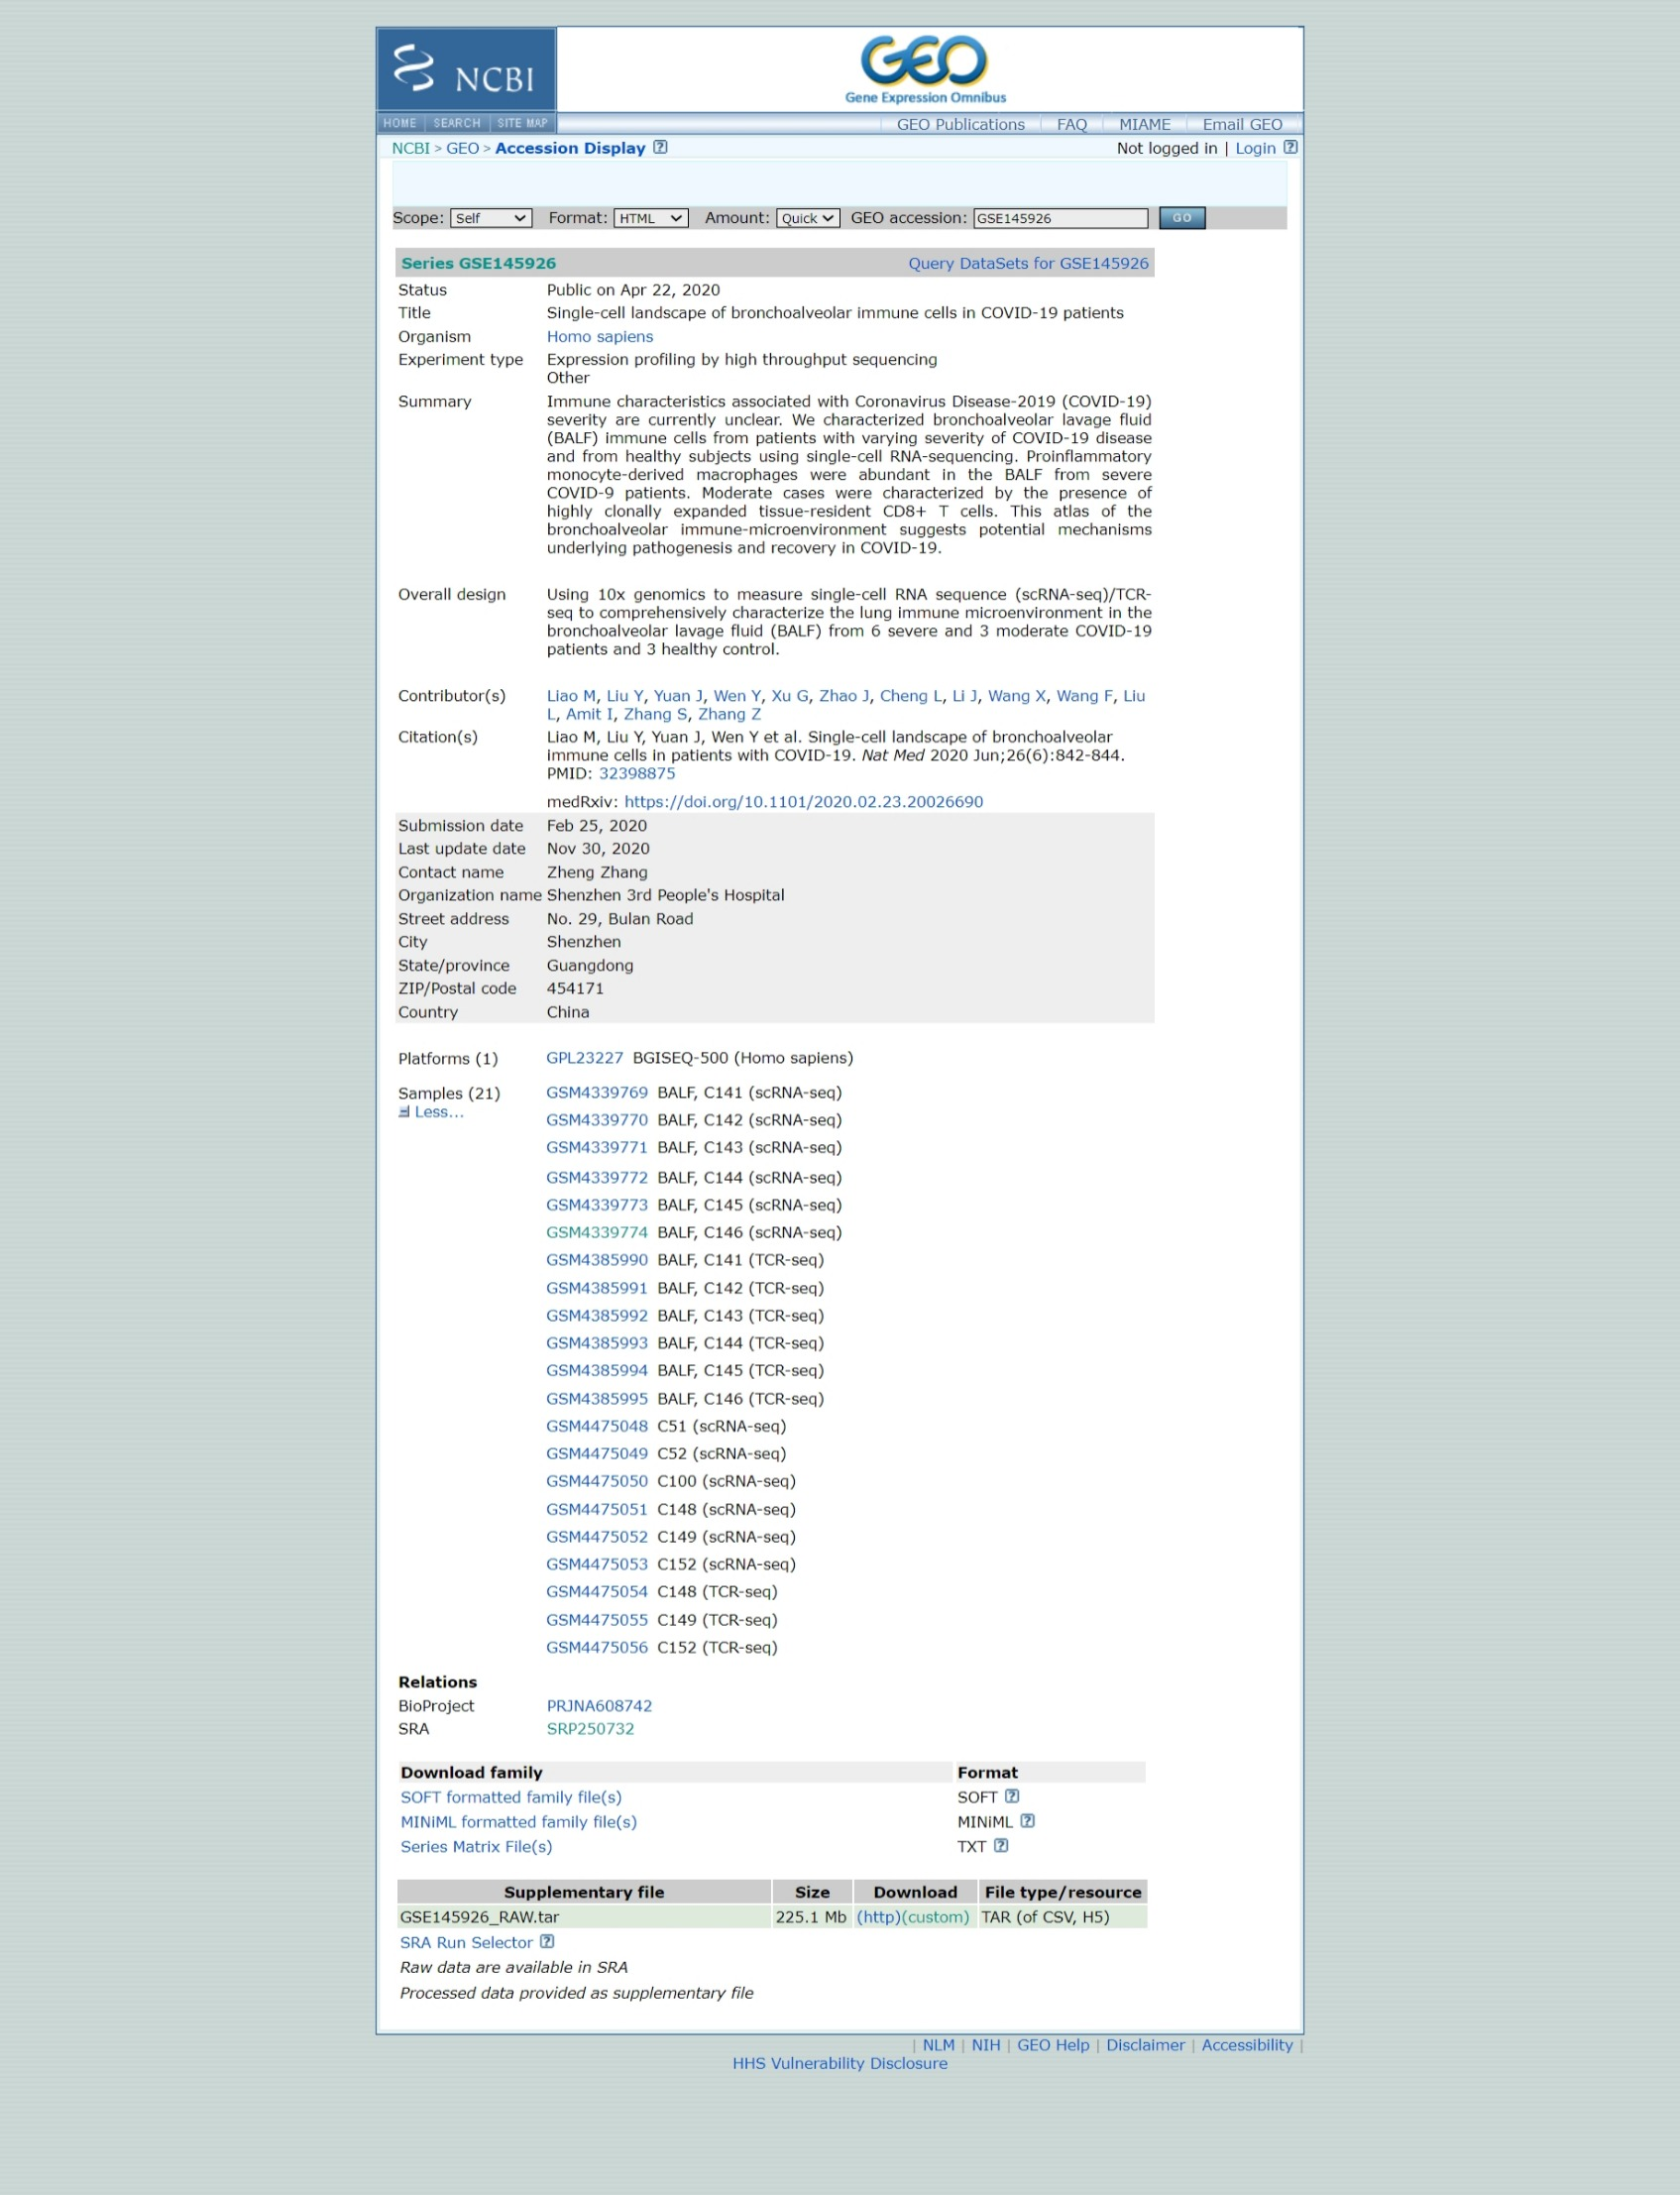

Download the GEO's raw data

In [ ]:
download.file('https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE145926&format=file','GSE145926_RAW.tar')
shell_call("tar -xf GSE145926_RAW.tar")
shell_call("rm GSE145926_RAW.tar")
shell_call("ls -lh")

Separate the scRNA and TCRseq files.

In [ ]:
shell_call("mkdir -p TCRseq")
shell_call("mv *_filtered_contig_annotations.csv.gz TCRseq/")
shell_call("mkdir -p scRNAseq")
shell_call("mv *_filtered_* scRNAseq/")
shell_call("ls -lh")

total 226M
-rw-r--r-- 1 root root 226M Aug  1 04:56 GSE145926_RAW.tar
drwxr-xr-x 1 root root 4.0K Jul 28 13:32 sample_data
drwxr-xr-x 2 root root 4.0K Aug  1 04:56 scRNAseq
drwxr-xr-x 2 root root 4.0K Aug  1 04:56 TCRseq

We're now going to read data for one sample. The 10X data is usually stored in the HDF5 format, which is a scientific high-performance format. The Read10X_h5() command is able to import this data and load it into R, using a special type of matrix, which has an efficient way of representing data with lots of zeroes.

How were these files created?

In [ ]:
sc <- Read10X_h5("scRNAseq/GSM4339769_C141_filtered_feature_bc_matrix.h5")

In [ ]:
## is there anything special about this matrix?
sc[33493:33500,1:3]

8 x 3 sparse Matrix of class "dgCMatrix"
       AAACCTGAGATGTCGG-1 AAACCTGAGGCTCATT-1 AAACCTGAGTTGTCGT-1
PCNT                    .                  .                  .
DIP2A                   .                  .                  .
S100B                   .                  .                  .
PRMT2                   1                  2                  .
MT-ND1                  5                 65                 57
MT-ND2                  1                 38                 48
MT-CO1                 18                100                118
MT-CO2                  4                 91                210

The . values in the matrix represent 0s (no molecules detected). Since most values in an scRNA-seq matrix are 0, Seurat uses a sparse-matrix representation whenever possible. This results in significant memory and speed savings for Drop-seq/inDrop/10x data. Observe, below, how the size of the object changes significantly (was ~1600MB and now is less then 160MB: this is a 10-fold change...)

In [ ]:
dense.size <- object.size(as.matrix(sc))
sparse.size <- object.size(sc)
format(dense.size, "MB")
format(sparse.size, "MB")
dense.size/sparse.size

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.6 GiB”


 'object_size' num 1.66e+08


[1] "1601.7 Mb"

[1] "158.6 Mb"

10.1 bytes

We use the usual matrix commands to handle a sparse matrix. See below how to:

Know the dimensions of the matrix;
Identify the class of a sparse matrix;
Select rows and columns of a sparse matrix using numeric indices;
Extract the names of the columns (or of the rows);
Select rows (or columns) of a sparse matrix using the names of the rows (or columns)

In [ ]:
## how many features?
## how many cells?
dim(sc)

## what's the class: sparse matrix
class(sc)

## select some rows and some columns
## is there anything special about this matrix?
sc[33495:33500,1:3]

## select using rownames (colnames)
sc[c("MIR1302-2HG","FAM138A","OR4F5"), 1:30]

## what are the names of genes
rownames(sc)[1:3]

## extract the names of cells
colnames(sc)[1:3]

[1] 33539  6249

[1] "dgCMatrix"
attr(,"package")
[1] "Matrix"

6 x 3 sparse Matrix of class "dgCMatrix"
       AAACCTGAGATGTCGG-1 AAACCTGAGGCTCATT-1 AAACCTGAGTTGTCGT-1
S100B                   .                  .                  .
PRMT2                   1                  2                  .
MT-ND1                  5                 65                 57
MT-ND2                  1                 38                 48
MT-CO1                 18                100                118
MT-CO2                  4                 91                210

  [[ suppressing 30 column names ‘AAACCTGAGATGTCGG-1’, ‘AAACCTGAGGCTCATT-1’, ‘AAACCTGAGTTGTCGT-1’ ... ]]



3 x 30 sparse Matrix of class "dgCMatrix"
                                                                       
MIR1302-2HG . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
FAM138A     . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
OR4F5       . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

[1] "MIR1302-2HG" "FAM138A"     "OR4F5"

[1] "AAACCTGAGATGTCGG-1" "AAACCTGAGGCTCATT-1" "AAACCTGAGTTGTCGT-1"

How big is this count table?

In [ ]:
print(dim(sc))
print(class(sc))

## Quality control

We will create the Seurat object to proceed with downstream analyses. Here, we chose to remove genes observed in fewer than 3 cells and cells with fewer than 200 genes. These filtering steps are not essential, feel free to use different cutoffs or ignore them entirely at this stage.

In [ ]:
sampleA <- CreateSeuratObject(counts = sc, project="sampleA", min.cells=3, min.features=200)

In [ ]:
## QC metrics for the first 5 cells
head(sampleA@meta.data, 5)

What do we know about the sampleA object? How many genes and how many cells does the Seurat object have? Also, why are these numbers different? Remember that we created the Seurat object specifying that each gene had to be present in, at least, 3 cells (otherwise, the gene is removed). We also specified that each cell is required to have, at least, 200 genes.

In [ ]:
sampleA

In [ ]:
## Let's check the dimensions of the original matrix (sc)
## and compared to the Seurat object (sampleA)
dim(sc)
dim(sampleA)
dim(sc) - dim(sampleA)

What is the size of our Seurat object?
How many genes and cells were removed from original table?

Identifying Doublets
Doublets of cells in the same well is a common problem in single-cell data. This can happen very often by overloading cells.

We will use the scDblFinder method to identify and remove this problematic cases from our dataset. The method needs to use an object called SingleCellExperiment, which is created within the Bioconductor infrastructure.

Once the object is ready, we apply the method. It uses a probabilist approach to identify doublets and, for this reason, can generate results that are slightly different from previous runs. To mitigate this reproducibility issue, we need to set a random seed, using the set.seed() command, which will guarantee that we get the same results everytime we run the code.

In [ ]:
## data <- sampleA
sce <- as.SingleCellExperiment(sampleA)
sce

## We need to set.seed() because the scDblFinder command
## uses a probabilist strategy to identify doublets. This
## means that, everytime we run the command, it will produce
## results that are slightly different. The set.seed()
## comman will guarantee the same results everytime.
set.seed(123)
results <- scDblFinder(sce, returnType = 'table') %>%
  as.data.frame() %>%
  filter(type == 'real')
head(results)

Note that the results table has a column called class, which classifies the cells in two types, as we can see below. The doublet cells are the ones that we want to remove from our dataset prior to downstream analyses. In other terms, the cells flagged as singlet are the only ones that we want to keep.

In [ ]:
results %>%
  dplyr::count(class)

Save the results of scDblFinder() to reuse later

In [ ]:
outfile = file.path('GSM4339769_doubletFile.txt')
write.table(results, outfile, sep='\t', quote=F,
            col.names=TRUE, row.names=TRUE)

Let's find the doublets and remove them from our matrix, i.e., let's keep only the singlets. Remember that, in this session, we are focusing on the Seurat object (sampleA), and that's why we will subset this object.



In [ ]:
keep = results %>%
  dplyr::filter(class == "singlet") %>%
  rownames()
sampleA = sampleA[, keep]
sampleA

The percentage of mitochondrial reads is not automatically calculated by Cell Ranger. So, first we have to do this. We use this opportunity to include the percentage of MT reads as metadata to the Seurat object (sampleA). Remember that high percentage of mitochondrial reads is generally associated to high-stress and low-quality cells.

In [ ]:
## %MT reads
sampleA[["percent.mt"]] <- PercentageFeatureSet(sampleA, pattern="^MT-")

This function enables you to easily calculate the percentage of all the counts belonging to a subset of the possible features for each cell. This is useful when trying to compute the percentage of transcripts that map to mitochondrial genes for example. The calculation here is simply the column sum of the matrix present in the counts slot for features belonging to the set divided by the column sum for all features times 100.

The notation used above includes a column called percent.mt to the metadata associated to sampleA, which is explored below. Note that, in the context we're woking, Feature means gene and Count means UMI.

In [ ]:
sampleA@meta.data %>% head()

In [ ]:
VlnPlot(sampleA, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol=3)

One dimensional violin plots are often difficult to interpret the entire distribution so let's try some histograms.  
This is also a demonstration of how to make plots without using Seurat's visualization commands

In [ ]:
sampleA.qc <- FetchData(sampleA,
                        vars=c("nFeature_RNA","nCount_RNA","percent.mt"))
sampleA.qc %>%
  ggplot() +
  geom_histogram(aes(x=nCount_RNA), bins=100)

Try to extract the mean of nCounts_RNA

In [ ]:
summary(sampleA.qc$nCount_RNA)

We see very clearly that the typical cell has about 20000 UMIs but this ranges from just a couple tens to over 60000

Let's zoom in on the low count end of the spectrum just to see if we can identify any structure (eg bimodality)

In [ ]:
sampleA.qc %>%
  ggplot() +
  geom_histogram(aes(x=nCount_RNA), bins=100) +
  xlim(0,1500)

Given the large dynamic range, perhaps a log scale will be useful

In [ ]:
sampleA.qc %>%
  ggplot() +
  geom_histogram(aes(x=nCount_RNA), bins=200) +
  scale_x_log10()

Now let's look at the number of genes per cell

In [ ]:
10^3.491

In [ ]:
sampleA.qc %>%
  ggplot() +
  geom_histogram(aes(x=nFeature_RNA), bins=200) +
  geom_vline(xintercept = 3096,color="red")
sampleA.qc %>%
  ggplot() +
  geom_histogram(aes(x=nFeature_RNA), bins=200) +
  geom_vline(xintercept = 10^(3.491),color="red") +
  scale_x_log10()
summary(sampleA.qc$nFeature_RNA)

Looks like the typical cell has data on about 3000 genes, ranging from 200 (the minimum we set when we created the Seurat object) to over 9000

And how about the percentage mitochondrial reads?

In [ ]:
sampleA.qc %>%
  ggplot() +
  geom_histogram(aes(x=percent.mt), bins=100) +
  geom_vline(xintercept = 10,color="red")
summary(sampleA.qc$percent.mt)

The majority of cells are below **5%** but some are over **50%**

It is often more useful to look at multiple QC metrics together instead of individually. Lets try some simple 2D scatter plots

In [ ]:
FeatureScatter(sampleA, feature1="nCount_RNA", feature2="percent.mt")

In [ ]:
FeatureScatter(sampleA, feature1="nCount_RNA", feature2="nFeature_RNA")

Remeber: we don't need to use only Seurat plotting tools.

ggplot2 is a powerful visualization tool, which handles tables nicely to create plots. Check the plot above (nFeature vs. nCount) and consider that it may be of interest to understand how the data behaves as a function of the percentage of MT reads.

In [ ]:
sampleA.qc %>%
  ggplot() +
  geom_point(aes(nCount_RNA, nFeature_RNA, colour=percent.mt), alpha=.50) +
  scale_x_log10() +
  scale_y_log10()

Most of this QC looks quite nice.  We don't see strikingly different subpopulations of cells by these QC metrics.
Just to be safe, let's remove cells with over 10% mitochrondrial reads, which may be a sign of ex-vivo damage during sample handling and library generation  

In [ ]:
#Filter using more than one variable
sampleA <- subset(sampleA, nCount_RNA > 500 & nFeature_RNA < 7000 & percent.mt < 10)

Let's reuse the plot we created on the last exercise and create a new column (called keep) using the metadata table. This column will identify the cells that we removed above.

In [ ]:
sampleA.qc %>%
  mutate(keep = if_else(nCount_RNA > 500 & nFeature_RNA < 7000 & percent.mt < 10, "keep", "remove")) %>%
  ggplot() +
  geom_point(aes(nCount_RNA, nFeature_RNA, colour=keep), alpha=.50) +
  scale_x_log10() +
  scale_y_log10()

In [ ]:
#sampleA <- subset(sampleA, subset = percent.mt < 10)
FeatureScatter(sampleA, feature1="nCount_RNA", feature2="percent.mt")
print(dim(sc))
print(dim(sampleA))


##Identify variable genes
To get a feel for the patterns of gene expression change across cells, let's start exploring some visualizations

The first step is to identify the most variable genes across the dataset.
Genes that don't vary across cells probably won't contribute much to downstream analyses, so we will focus on the top 2000 most variable genes here.
First we will apply a variance stablizing transformation (vst) to model the mean/variance relationship

In [ ]:
sampleA <- FindVariableFeatures(sampleA, selection.method = "vst", nfeatures = 2000)

Let's see the names of the most highly variable genes now

In [ ]:
top10 <- head(VariableFeatures(sampleA), 10)
top10

Now let's plot the variance (after vst) versus the mean of expression for each gene, coloring the top 2000 and labelling the top 10

In [ ]:
plot1 <- VariableFeaturePlot(sampleA)
LabelPoints(plot=plot1, points = top10, repel=T, xnudge=0, ynudge=0) + theme(legend.position="none")

##Scaling gene expression
The next step is to scale the expression of each gene to have an average expression over cells of 0 and a variance of 1. This type of linear transformation is commonly applied in many big data domains to allow feautures (eg genes) with different magnitudes (eg expression levels) to contribute equally to downstream analyses. In Seurat, the results of this transformation don't overwrite the unscaled expression values, instead they are stored in sampleA[["RNA"]]@scale.data

scale the data

In [ ]:
all.genes <- rownames(sampleA)
sampleA <- ScaleData(sampleA, features = all.genes)

# Dimension Reduction

##PCA
We've identified highly variable genes and equalized the scale of different genes. Now let's do our first dimensionality reduction and visualization, PCA.

perform PCA

In [ ]:
sampleA <- RunPCA(sampleA, features = VariableFeatures(sampleA))
DimPlot(sampleA, reduction="pca")

Hmm, that doesn't show much structure.  It seems like the vast majority of the variation across cells is coming from one direction in gene expression space.
Maybe we can learn something by looking at what genes contribute to that PC.


The explained variance by each principal component is the ratio between each eigenvalue and the sum of all eigenvalues. We need to remember that Seurat does not compute all the principal components, because it is computationally heavy. In our case, it calculated the first 50 PCs, so all the inference must be conditional on these 50 PCs (and not all the 3894 possible PCs).

In [ ]:
pca = sampleA[["pca"]]

## get the eigenvalues
evs = pca@stdev^2
total.var = pca@misc$total.variance
varExplained = evs/total.var
pca.data = data.frame(PC=factor(1:length(evs)),
                      percVar=varExplained*100)
pca.data$cumulVar = cumsum(pca.data$percVar)

head(pca.data, 20)

pca.data[1:10,] %>%
  ggplot(aes(x=PC, y=percVar)) +
  geom_bar(stat='identity') +
  geom_hline(yintercept = 1, colour="red", linetype=3) +
  labs(title="Variance Explanation by PCA") +
  xlab("Principal Components") +
  ylab("Percentage of Explained Variance") +
  theme_bw()

pca.data[1:10,] %>%
  ggplot(aes(x=PC, y=cumulVar)) +
  geom_bar(stat='identity') +
  geom_hline(yintercept = 50, colour="red", linetype=3) +
  labs(title="Cumulative Variance Explanation by PCA") +
  xlab("Principal Components") +
  ylab("Cumulative Percentage of Explained Variance") +
  theme_bw()

Observing PC1, it seems that it is account for the overall signal per cell. We can't see clear groups of different gene sets (unlike PC2).

[ ]


The other PCs instead do seem to be measuring the relative expression of different genes. If PC1 is just the total signal per cell maybe we can visualize that directly.

In [ ]:
DimHeatmap(sampleA, dims = 1:2)

Calculate the variance for each component to find an explanation

It appears that **PC1** just has postive weights from a bunch of genes.  This suggests it isn't balancing expression of different gene sets, it's just measuring overall signal.  What do other PCs look like?

In [ ]:
DimHeatmap(sampleA, dims = 1:5, cells = 500, balanced=T)

The other PCs instead do seem to be measuring the relative expression of
different genes. If PC1 is just the total signal per cell maybe we can
visualize that directly.

In [ ]:
FeaturePlot(sampleA, features="nCount_RNA")

That definitely seems to be the case.  In fact, it is not surprising because we saw that there was a huge variation in the total RNA per cell in our QC and we never corrected for it.

To address this, we'll take a common and straightforward approach of dividing the counts for each gene by the total UMI for that cell and then take a log transformation.  
In truth, we will also multiply by a scaling factor of 10,000 before the log transformation. That is arbitrary and not particularly important but is common practice.


In [ ]:
sampleA = NormalizeData(sampleA, normalization.method="LogNormalize",
                        scale.factor=10000)

Now we have to re-identify highly variable features and re-scale

In [ ]:
sampleA = FindVariableFeatures(sampleA, selection.method="vst",
                               nfeatures=2000)
top10 = head(VariableFeatures(sampleA), 10)
top10

In [ ]:
plot1 = VariableFeaturePlot(sampleA)
LabelPoints(plot=plot1, points=top10, repel=TRUE, xnudge=1, ynudge=1) +
  theme(legend.position="none")

In [ ]:
sampleA <- ScaleData(sampleA, features = all.genes)
# perform PCA
sampleA <- RunPCA(sampleA, features = VariableFeatures(sampleA))
DimPlot(sampleA, reduction="pca")

In [ ]:
FeaturePlot(sampleA, features="nCount_RNA")

It doesn't look better, but that is, can you play to improve it?

##UMAP
PCA has both the bug and the feature that it is a linear transformation. That's a feature in so far as it is easily interpretable/meaningful. It's a bug however because it is limiting for visualization. Uniform Manifold Approximation and Projection (UMAP) is a relatively recently developed nonlinear approach that has gained widespread use in the single cell community. Let's check it out.

While we can calculate UMAP using the full original dimensional space, it can be useful to do some initial dimensionality reduction via PCA. This will both speed up our calculations and, hopefully, remove noise from the distance metrics.

In [ ]:
# To use PCA for dimensionality reduction we have to choose how many principal
# components to use.
# Since PCA is linear and orthogonal, the PC values are straightforward to interpret
# as explaining a fraction of the total variation across the data.
# Let's look at the top PCs.
ElbowPlot(sampleA)

In [ ]:
# By default we see the top 20 but we can ask for more if we like.
ElbowPlot(sampleA, ndims=50)

In [ ]:
# Note that the previous RunPCA only calculated the top 50.  If we want to look
# at more principal component values, we have to calculate them first.  We could go
# back and re-run the PCA but for the sake of time let's just use the top 50

# While there's no clear cutoff (there rarely is), it doesn't look like all top
# 50 will be essential.  Our calculations will of course be quickest if we only
# use 2 PCs, let's see what effect that has.
sampleA <- RunUMAP(sampleA, dims=1:2, verbose=F)
DimPlot(sampleA, label=T) + NoLegend()

In [ ]:
# That seems suspicious.  It doesn't at all match our expectations about gene expression
# profiles of PBMC subsets should look like.  Let's see if it is a robust pattern, of if
# it changes a lot when we add just one more PC.

sampleA <- RunUMAP(sampleA, dims=1:3, verbose=F)
DimPlot(sampleA, label=T) + NoLegend()

In [ ]:
# Indeed, it changed quite a bit!  It still doesn't really match what we might expect
# for PBMCs.  Furthermore, the plot of PC values above doesn't plateau until somewhere
# in the 10-20 range.  Let's use the top 15.

sampleA <- RunUMAP(sampleA, dims=1:15, verbose=F)
DimPlot(sampleA, label=T) + NoLegend()

In [ ]:
# Some nice clusters!  First let's make sure none of them are driven by QC artifacts.

FeaturePlot(sampleA, features=c("percent.mt"))

In [ ]:
FeaturePlot(sampleA, features=c("nCount_RNA"))

In [ ]:
# This looks good.  It does not seem like either percent mitochronrial reads or the
# total UMI per cell is dominating any of the structure we see in the UMAP.

# While we're exploring, let's see about the top PCs.  While both UMAP and PCA are in
# some sense trying to find natural variations in the data, they are very different
# calculations in detail and we should not assume they are (or are not) related.
FeaturePlot(sampleA, features=c("PC_1"))

In [ ]:
# PC1 does seem to be separating the cells on the far right from the others.
FeaturePlot(sampleA, features=c("PC_2"))

In [ ]:
# PC2 seems to mostly be defining a gradient just across cells within the cloud
# in the top left

# Now let's look at some individual genes.
# For an unsupervised approach we could start with some of the most variable genes
top10

In [ ]:
FeaturePlot(sampleA, features=top10[1:4], ncol=2)

In [ ]:
FeaturePlot(sampleA, features=top10[5:8], ncol=2)

In [ ]:
FeaturePlot(sampleA, features=top10[9:10], ncol=1)

In [ ]:
# We can also look at some of the genes from top PCs
print(sampleA[["pca"]], dims=1:5, nfeatures=2)

In [ ]:
FeaturePlot(sampleA, features=c("CTSC", "CD52", "LRRIQ1", "EFCAB1"))

In [ ]:
FeaturePlot(sampleA, features=c("CD68", "SERPING1", "IL32", "CD3E"))

#Clustering
Now let's do some formal clustering of this data. While many different clustering algorithms can be used, we will use the nearest-neighbor graph representation of this data and the Louvain algorithm to identify clusters/communities within the graph. Since this framework only leverages distance metrics to the nearest neighbors it is relatively robust to the curse of dimensionality compared to other clustering algorithms.

In [ ]:
# We'll calculate distances in the first 20 dimensions.
sampleA <- FindNeighbors(sampleA, dims=1:20)
sampleA <- FindClusters(sampleA)

In [ ]:
# Now we will visualize cluster membership in the UMAP space.
DimPlot(sampleA, reduction="umap")

In [ ]:
# Almost all clustering algorithms have some sort of free parameter that controls
# how many clusters are identified.
# In the Louvain algorithm we have the *resolution* which, holding all other
# parameters (such as the dimensions, the number of nearest neighbors, etc) constant,
# controls the number of clusters.  Low (high) values for resultion give low (high)
# numbers of clusters.  Let's explore this.
sampleA <- FindClusters(sampleA, resolution=0.01)

In [ ]:
DimPlot(sampleA, reduction="umap")

In [ ]:
sampleA <- FindClusters(sampleA, resolution=10)

In [ ]:
DimPlot(sampleA)

In [ ]:
# It can be useful to see how clusters corresponding to one value of *resolution*
# correspond to those from another *resolution*.  The clustree package does a nice
# job of visualizing this over the clusterings we have already performed.
head(sampleA[[]])

In [ ]:
clustree(sampleA,prefix="RNA_snn_res.")

In [ ]:
sampleA <- FindClusters(sampleA, resolution=seq(0.1, 2, by=0.1))

In [ ]:
clustree(sampleA,prefix="RNA_snn_res.")

In [ ]:
# Now let's go back to the resolution that gave us three clusters
sampleA <- FindClusters(sampleA,resolution=0.01)
DimPlot(sampleA)

In [ ]:
# Here is how we can identify marker genes for cluster 0
cluster0.markers <- FindMarkers(sampleA, ident.1=0, min.pct=0.25)
head(cluster0.markers)

In [ ]:
FeaturePlot(sampleA,features="C1QA")

In [ ]:
# Since we didn't specify, the previous calculation gave us genes either
# significantly over or under expressed in our population of interest.
# Sometimes we just want over expressed genes, which is easy to filter for.
cluster0.markers <- FindMarkers(sampleA, ident.1=0, min.pct=0.25,only.pos=T)
head(cluster0.markers, 10)

In [ ]:
FeaturePlot(sampleA, features="RBP7")

In [ ]:
FeaturePlot(sampleA, features=c("C1QC"))

In [ ]:
FeaturePlot(sampleA, features=c("PTAFR"))

In [ ]:
# It's always good to try multiple different visualizations.
VlnPlot(sampleA, features=c("PTAFR", "C1QB", "RBP7"))

In [ ]:
sampleA %>%
  FetchData(vars=c("C1QB", "seurat_clusters")) %>%
  ggplot() +
  geom_histogram(aes(x=C1QB), bins=100) +
  facet_wrap(. ~ seurat_clusters)

In [ ]:
# Now let's find over-expressed marker genes for all clusters.
sampleA.markers = FindAllMarkers(sampleA, only.pos=TRUE,
                            min.pct=0.25, logfc.threshold=0.25)
head(sampleA.markers)
topMarkers <- sampleA.markers %>%
  group_by(cluster) %>%
  top_n(n=5, wt=avg_log2FC)
DoHeatmap(sampleA, features = topMarkers$gene) + NoLegend()

In [ ]:
# If we crank up the resolution a little we get some finer-grained separation
# of the UMAP clouds.
sampleA <- FindClusters(sampleA, resolution=0.2)

In [ ]:
DimPlot(sampleA)

# Differential Expression

In [ ]:
# Let's see if cluster 2 and cluster 0 really have different gene expression
# patterns and, if so, whether those match any biology we already know and
# might expect to see in PBMCs.
cluster1vs0 <- FindMarkers(sampleA, ident.1 = 2, ident.2 = 0)
head(cluster1vs0, 20)

In [ ]:
FeaturePlot(sampleA, features="MCEMP1")

In [ ]:
FeaturePlot(sampleA, features="CXCL11")

In [ ]:
# Note that CXCL11 is also expressed in another group.  We had
# ignored them when looking for differentially expressed genes between clusters
# 2 and 0 so this should not be surprising.
sampleA.markers = FindAllMarkers(sampleA, only.pos=TRUE, min.pct=0.25)
topMarkers = sampleA.markers %>%
  group_by(cluster) %>%
  top_n(n=5, wt=avg_log2FC)
DoHeatmap(sampleA, features = topMarkers$gene) + NoLegend()

In [ ]:
topMarkers = sampleA.markers %>%
  group_by(cluster) %>%
  top_n(n=5, wt=avg_log2FC)
DoHeatmap(sampleA, features = c("CXCL11", topMarkers$gene)) + NoLegend()

# Annotating Cell Types

Interpreting the findings we obtained is likely the most difficult task during single-cell data analysis. By annotating the cell types using statistical methods that compare expression profiles from our data to a reference dataset, we can go beyond the abstract definitions given by the clusters we identified.

We start by loading a reference dataset that contains the cell types we expect to see on our samples. The `celldex` package provides a number of curated and well-annotated datasets. Most of them are originated from bulk RNA-Seq and microarray experiments, but they are more than enough to annotated single-cell datasets. In our example, we will use the Blueprint and ENCODE reference dataset.

In [ ]:
library(celldex)
ref = BlueprintEncodeData()
ref

Then, to use the `SingleR()` function, we need to convert the `Seurat` object to a `SingleCellExperiment` Bioconductor object. The `SingleR()` function takes our dataset, the reference dataset and the labels of the reference dataset.

In [ ]:
my.sce = as.SingleCellExperiment(sampleA)
pred = SingleR(my.sce, ref=ref, labels=ref$label.main)
table(pred$labels)

We can use a heatmap to visualize the resulting cell type annotation. At the top of the heatmap, we see the color code identifying the different cell types

In [ ]:
plotScoreHeatmap(pred)

A heatmap can also be used to show the distribution of the cell types by the clusters we identified using `Seurat`.

In [ ]:
my.table = table(Assigned=pred$pruned.labels,
                 cluster=my.sce$seurat_clusters)
my.table
library(pheatmap)
pheatmap(log2(my.table + 1))

# GO Enrichment Analyses

In [ ]:
my.genes = sampleA.markers %>%
  filter(abs(avg_log2FC) > 1,
         p_val_adj < 0.10) %>%
  dplyr::select(gene) %>%
  pull()
head(my.genes)

In [ ]:
library(clusterProfiler)

my.map = bitr(my.genes,
              fromType="SYMBOL",
              toType="ENTREZID",
              OrgDb="org.Hs.eg.db")
head(my.map)
length(my.genes) - nrow(my.map)

## GO Classification

In [ ]:
## subontologies: BP, MF, CC
ggo_bp = groupGO(gene     = my.map$ENTREZID,
                 OrgDb    = org.Hs.eg.db,
                 ont      = "BP",
                 readable = TRUE)
head(ggo_bp)

In [ ]:
## subontologies: BP, MF, CC
ggo_mf = groupGO(gene     = my.map$ENTREZID,
                 OrgDb    = org.Hs.eg.db,
                 ont      = "MF",
                 readable = TRUE)
head(ggo_mf)

In [ ]:
## subontologies: BP, MF, CC
ggo_cc = groupGO(gene     = my.map$ENTREZID,
                 OrgDb    = org.Hs.eg.db,
                 ont      = "CC",
                 readable = TRUE)

head(ggo_cc)

## GO over-representation analysis

In [ ]:
ego <- enrichGO(gene          = my.map$ENTREZID,
                OrgDb         = org.Hs.eg.db,
                ont           = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.01,
                qvalueCutoff  = 0.05,
        readable      = TRUE)
head(ego)

## GO Gene Set Enrichment Analysis

In [ ]:
gse_go = gseGO(geneList     = geneList,
              OrgDb        = org.Hs.eg.db,
              ont          = "CC",
              minGSSize    = 100,
              maxGSSize    = 500,
              pvalueCutoff = 0.05,
              verbose      = FALSE)
head(gse_go)